In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)
dados["finalizado"] = dados["nao_finalizado"].map({1: 0, 0: 1})
#sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")
#sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado",col="finalizado")

# jogar fora
dados = dados.query("horas_esperadas > 0")
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 60.56%


In [33]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")

x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0


In [34]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [36]:
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_ [xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [44]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

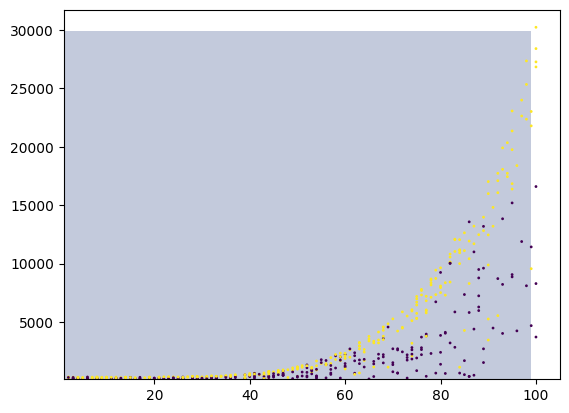

In [45]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)